In [5]:
import dask
import dask.array as da
from dask_jobqueue import PBSCluster
from dask.distributed import Client
dask.config.set(**{'array.slicing.split_large_chunks': False}) #supress warning about large chunk

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('/glade/work/kjmayer/research/catalyst/TransferLearning/runmean_analysis/artificial_bias/perfectmodel_TLtest/E3SM_analysis/functions/')
from utils import detrend_members

In [2]:
# Setup your PBSCluster
cluster = PBSCluster(
                    cores=1, 
                    memory='5GB', 
                    processes=1, 
                    queue='casper', 
                    local_directory='$TMPDIR', # Use your local directory
                    resource_spec='select=1:ncpus=1:mem=5GB', 
                    project='P06010014', 
                    walltime='24:00:00', 
                    interface='ext', 
                    )

# Scale up
cluster.scale(20)

client = Client(cluster)
client

/glade/work/kjmayer/conda-envs/tf2-env-v2/lib/python3.9/site-packages/dask_jobqueue/pbs.py:82: FutureWarning: project has been renamed to account as this kwarg was used wit -A option. You are still using it (please also check config files). If you did not set account yet, project will be respected for now, but it will be removed in a future release. If you already set account, project is ignored and you can remove it.
  warnings.warn(warn, FutureWarning)
/glade/work/kjmayer/conda-envs/tf2-env-v2/lib/python3.9/site-packages/dask_jobqueue/pbs.py:82: FutureWarning: project has been renamed to account as this kwarg was used wit -A option. You are still using it (please also check config files). If you did not set account yet, project will be respected for now, but it will be removed in a future release. If you already set account, project is ignored and you can remove it.
  warnings.warn(warn, FutureWarning)


Connection method: Cluster object,Cluster type: dask_jobqueue.PBSCluster
Dashboard: https://jupyterhub.hpc.ucar.edu/stable/user/kjmayer/proxy/8787/status,
Dashboard: https://jupyterhub.hpc.ucar.edu/stable/user/kjmayer/proxy/8787/status,Workers: 0
Total threads: 0,Total memory: 0 B
Comm: tcp://128.117.208.66:36633,Workers: 0
Dashboard: https://jupyterhub.hpc.ucar.edu/stable/user/kjmayer/proxy/8787/status,Total threads: 0
Started: Just now,Total memory: 0 B


In [3]:
# client.close()

### Load CESM2-LE & Split 

In [3]:
zpath = '/glade/derecho/scratch/kjmayer/DATA/E3SMv2/Z500/'
ppath = '/glade/derecho/scratch/kjmayer/DATA/E3SMv2/PRECT/'

pfiname = 'PRECT_allmem_1950-2014_20S-20N_regrid2.5x2.5.nc'
zfiname = 'Z500_allmem_1950-2014_20-90N_regrid2.5x2.5.nc'

# North Pacific Region: 
# [lat = 30-60N, lon = 170-240E]
ilatpt = 30  
flatpt = 60
ilonpt = 170
flonpt = 240

ens = ['0101','0111','0121','0131','0141','0151','0161','0171','0181','0191',
       '0201','0211','0221','0231','0241','0251','0261','0271','0281','0291',
       '0301']

In [5]:
%%time
precip = xr.open_dataset(ppath+pfiname,chunks='auto').PRECT
precip['time'] = precip.indexes['time'].to_datetimeindex()
# ensemble mean:
X1_ensmean = precip.mean(dim='ens')
# detrending:
print('detrending members')
X1xr  = detrend_members(data = precip,
                        ensmean_data = X1_ensmean, 
                        npoly = 3)

<timed exec>:2: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.


detrending members


/glade/work/kjmayer/conda-envs/tf2-env-v2/lib/python3.9/site-packages/xarray/core/indexing.py:1443: PerformanceWarning: Slicing with an out-of-order index is generating 22 times more chunks
  return self.array[key]


CPU times: user 3min 30s, sys: 26.4 s, total: 3min 56s
Wall time: 1h 9s


In [6]:
%%time
for m in range(len(ens[16:])):
    print(ens[m+16])
    print('running mean')
    X1xr_runmean = X1xr[m+16].rolling(time=7,center=False).mean('time').dropna('time')
    print('saving')
    X1xr_runmean.to_netcdf(ppath+'PRECT_mem'+ens[m+16]+'_7daymean_1950-2014_20S-20N_regrid2.5x2.5_polydetrend_allmems.nc')
    del X1xr_runmean

0261
running mean


/glade/work/kjmayer/conda-envs/tf2-env-v2/lib/python3.9/site-packages/distributed/client.py:3160: UserWarning: Sending large graph of size 126.74 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(


saving


/glade/work/kjmayer/conda-envs/tf2-env-v2/lib/python3.9/site-packages/distributed/client.py:3160: UserWarning: Sending large graph of size 122.98 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(


0271
running mean


/glade/work/kjmayer/conda-envs/tf2-env-v2/lib/python3.9/site-packages/distributed/client.py:3160: UserWarning: Sending large graph of size 126.74 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(


saving


/glade/work/kjmayer/conda-envs/tf2-env-v2/lib/python3.9/site-packages/distributed/client.py:3160: UserWarning: Sending large graph of size 122.98 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(


0281
running mean


/glade/work/kjmayer/conda-envs/tf2-env-v2/lib/python3.9/site-packages/distributed/client.py:3160: UserWarning: Sending large graph of size 126.74 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(


saving


/glade/work/kjmayer/conda-envs/tf2-env-v2/lib/python3.9/site-packages/distributed/client.py:3160: UserWarning: Sending large graph of size 122.98 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(


0291
running mean


/glade/work/kjmayer/conda-envs/tf2-env-v2/lib/python3.9/site-packages/distributed/client.py:3160: UserWarning: Sending large graph of size 126.74 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(


saving


/glade/work/kjmayer/conda-envs/tf2-env-v2/lib/python3.9/site-packages/distributed/client.py:3160: UserWarning: Sending large graph of size 122.98 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(


0301
running mean


/glade/work/kjmayer/conda-envs/tf2-env-v2/lib/python3.9/site-packages/distributed/client.py:3160: UserWarning: Sending large graph of size 126.74 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(


saving


/glade/work/kjmayer/conda-envs/tf2-env-v2/lib/python3.9/site-packages/distributed/client.py:3160: UserWarning: Sending large graph of size 122.98 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(


CPU times: user 3h 1min 45s, sys: 5min 24s, total: 3h 7min 10s
Wall time: 4h 26min 8s


/glade/work/kjmayer/conda-envs/tf2-env-v2/lib/python3.9/site-packages/distributed/client.py:3160: UserWarning: Sending large graph of size 126.74 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(


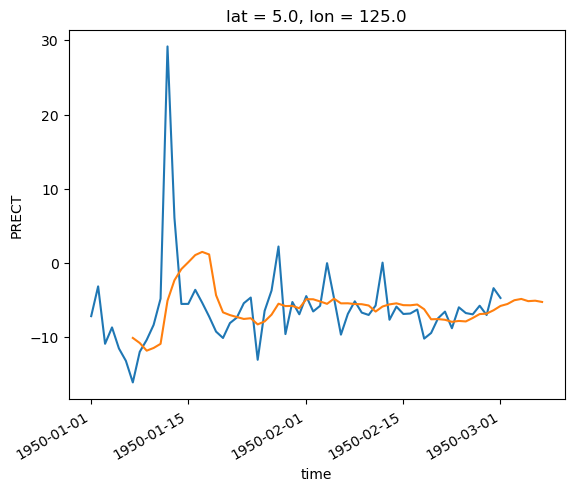

In [9]:
X1xr_runmean = X1xr[0].rolling(time=7,center=False).mean('time').dropna('time')
X1xr[0,:60,10,50].plot()
X1xr_runmean[:60,10,50].plot()
# del X1xr

In [4]:
# open dataset:
z500 = xr.open_dataset(zpath+zfiname,chunks='auto').Z500
z500['time'] = z500.indexes['time'].to_datetimeindex()
z500pt = z500.where((z500['lat'] >= ilatpt) &
                    (z500['lat'] <= flatpt) &
                    (z500['lon'] >= ilonpt) & 
                    (z500['lon'] <= flonpt),
                    drop = True).squeeze().mean(['lat','lon'])
del z500
Y1_ensmean = z500pt.mean(dim='ens').chunk('auto')

/glade/derecho/scratch/kjmayer/tmp/ipykernel_23698/77545900.py:3: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  z500['time'] = z500.indexes['time'].to_datetimeindex()


detrending members
detrend member 0


/glade/work/kjmayer/conda-envs/tf2-env-v2/lib/python3.9/site-packages/xarray/core/indexing.py:1443: PerformanceWarning: Slicing with an out-of-order index is generating 22 times more chunks
  return self.array[key]


calculating rolling mean on member 0


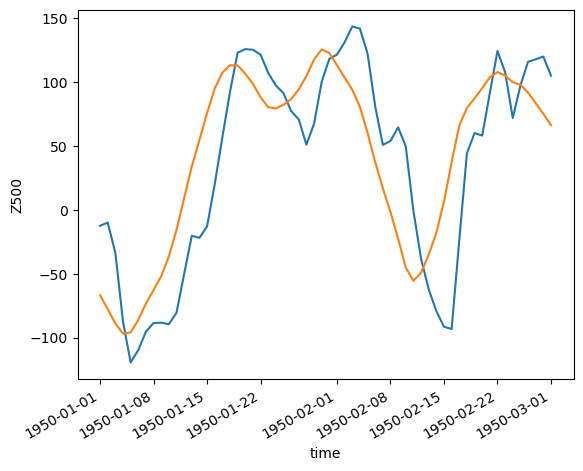

saving member 0
detrend member 1


/glade/work/kjmayer/conda-envs/tf2-env-v2/lib/python3.9/site-packages/xarray/core/indexing.py:1443: PerformanceWarning: Slicing with an out-of-order index is generating 22 times more chunks
  return self.array[key]


calculating rolling mean on member 1
saving member 1
detrend member 2


/glade/work/kjmayer/conda-envs/tf2-env-v2/lib/python3.9/site-packages/xarray/core/indexing.py:1443: PerformanceWarning: Slicing with an out-of-order index is generating 22 times more chunks
  return self.array[key]


calculating rolling mean on member 2
saving member 2
detrend member 3


/glade/work/kjmayer/conda-envs/tf2-env-v2/lib/python3.9/site-packages/xarray/core/indexing.py:1443: PerformanceWarning: Slicing with an out-of-order index is generating 22 times more chunks
  return self.array[key]


calculating rolling mean on member 3
saving member 3
detrend member 4


/glade/work/kjmayer/conda-envs/tf2-env-v2/lib/python3.9/site-packages/xarray/core/indexing.py:1443: PerformanceWarning: Slicing with an out-of-order index is generating 22 times more chunks
  return self.array[key]


calculating rolling mean on member 4
saving member 4
detrend member 5


/glade/work/kjmayer/conda-envs/tf2-env-v2/lib/python3.9/site-packages/xarray/core/indexing.py:1443: PerformanceWarning: Slicing with an out-of-order index is generating 22 times more chunks
  return self.array[key]


calculating rolling mean on member 5
saving member 5
detrend member 6


/glade/work/kjmayer/conda-envs/tf2-env-v2/lib/python3.9/site-packages/xarray/core/indexing.py:1443: PerformanceWarning: Slicing with an out-of-order index is generating 22 times more chunks
  return self.array[key]


calculating rolling mean on member 6
saving member 6
detrend member 7


/glade/work/kjmayer/conda-envs/tf2-env-v2/lib/python3.9/site-packages/xarray/core/indexing.py:1443: PerformanceWarning: Slicing with an out-of-order index is generating 22 times more chunks
  return self.array[key]


calculating rolling mean on member 7
saving member 7
detrend member 8


/glade/work/kjmayer/conda-envs/tf2-env-v2/lib/python3.9/site-packages/xarray/core/indexing.py:1443: PerformanceWarning: Slicing with an out-of-order index is generating 22 times more chunks
  return self.array[key]


calculating rolling mean on member 8
saving member 8
detrend member 9


/glade/work/kjmayer/conda-envs/tf2-env-v2/lib/python3.9/site-packages/xarray/core/indexing.py:1443: PerformanceWarning: Slicing with an out-of-order index is generating 22 times more chunks
  return self.array[key]


calculating rolling mean on member 9
saving member 9
detrend member 10


/glade/work/kjmayer/conda-envs/tf2-env-v2/lib/python3.9/site-packages/xarray/core/indexing.py:1443: PerformanceWarning: Slicing with an out-of-order index is generating 22 times more chunks
  return self.array[key]


calculating rolling mean on member 10
saving member 10
detrend member 11


/glade/work/kjmayer/conda-envs/tf2-env-v2/lib/python3.9/site-packages/xarray/core/indexing.py:1443: PerformanceWarning: Slicing with an out-of-order index is generating 22 times more chunks
  return self.array[key]


calculating rolling mean on member 11
saving member 11
detrend member 12


/glade/work/kjmayer/conda-envs/tf2-env-v2/lib/python3.9/site-packages/xarray/core/indexing.py:1443: PerformanceWarning: Slicing with an out-of-order index is generating 22 times more chunks
  return self.array[key]


calculating rolling mean on member 12
saving member 12
detrend member 13


/glade/work/kjmayer/conda-envs/tf2-env-v2/lib/python3.9/site-packages/xarray/core/indexing.py:1443: PerformanceWarning: Slicing with an out-of-order index is generating 22 times more chunks
  return self.array[key]


calculating rolling mean on member 13
saving member 13
detrend member 14


/glade/work/kjmayer/conda-envs/tf2-env-v2/lib/python3.9/site-packages/xarray/core/indexing.py:1443: PerformanceWarning: Slicing with an out-of-order index is generating 22 times more chunks
  return self.array[key]


calculating rolling mean on member 14
saving member 14
detrend member 15


/glade/work/kjmayer/conda-envs/tf2-env-v2/lib/python3.9/site-packages/xarray/core/indexing.py:1443: PerformanceWarning: Slicing with an out-of-order index is generating 22 times more chunks
  return self.array[key]


calculating rolling mean on member 15
saving member 15
detrend member 16


/glade/work/kjmayer/conda-envs/tf2-env-v2/lib/python3.9/site-packages/xarray/core/indexing.py:1443: PerformanceWarning: Slicing with an out-of-order index is generating 22 times more chunks
  return self.array[key]


calculating rolling mean on member 16
saving member 16
detrend member 17


/glade/work/kjmayer/conda-envs/tf2-env-v2/lib/python3.9/site-packages/xarray/core/indexing.py:1443: PerformanceWarning: Slicing with an out-of-order index is generating 22 times more chunks
  return self.array[key]


calculating rolling mean on member 17
saving member 17
detrend member 18


/glade/work/kjmayer/conda-envs/tf2-env-v2/lib/python3.9/site-packages/xarray/core/indexing.py:1443: PerformanceWarning: Slicing with an out-of-order index is generating 22 times more chunks
  return self.array[key]


calculating rolling mean on member 18
saving member 18
detrend member 19


/glade/work/kjmayer/conda-envs/tf2-env-v2/lib/python3.9/site-packages/xarray/core/indexing.py:1443: PerformanceWarning: Slicing with an out-of-order index is generating 22 times more chunks
  return self.array[key]


calculating rolling mean on member 19
saving member 19
detrend member 20


/glade/work/kjmayer/conda-envs/tf2-env-v2/lib/python3.9/site-packages/xarray/core/indexing.py:1443: PerformanceWarning: Slicing with an out-of-order index is generating 22 times more chunks
  return self.array[key]


calculating rolling mean on member 20
saving member 20
CPU times: user 2h 49min 52s, sys: 8min 19s, total: 2h 58min 11s
Wall time: 11h 1min 6s


In [9]:
%%time
print('detrending members')
for e in range(len(ens)):
    print('detrend member '+str(e))
    Y1xr  = detrend_members(data = z500pt[e], 
                            ensmean_data = Y1_ensmean, 
                            npoly = 3)
    print('calculating rolling mean on member '+str(e))
    Y1xr_runmean = Y1xr.rolling(time=7,center=False).mean('time').dropna('time')
    Y1xr_runmean = Y1xr_runmean.assign_coords(time=Y1xr.time[:-1*(7-1)])

    if e ==0:
        Y1xr[:60].plot()
        Y1xr_runmean[:60].plot()
        plt.show()
        
    print('saving member '+str(e))
    Y1xr_runmean.to_netcdf(zpath+'Z500_mem'+ens[e]+'_7daymean_1950-2014_30-60Nx170-240E_regrid2.5x2.5_polydetrend_allmems.nc')
    del Y1xr_runmean

